# Pymaceuticals Inc.
---
### Study Observations

- Mice that were part of the Capomulin and Ramicane treatment groups showed smaller final tumor volume than the Infubinol and Ceftamin treatment groups.
- There is a strong positive correlation (r = 0.84) between mouse weight and average tumor volume.

Note: the mouse with the duplicate data was dropped because the same timepoints had different tumor volumes and would only introduce noise in the dataset.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single DataFrame
combined_df = study_results.merge(mouse_metadata, how = 'left', on = 'Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
num_mice = len(combined_df['Mouse ID'].unique())
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# these are the duplicate data for mouse ID g989 that need to be removed from the dataset
duplicate = combined_df[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# getting all the data from mouse g989
duplicate_mouse_data = combined_df[combined_df['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
cleaned_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice) == False]
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = len(cleaned_df['Mouse ID'].unique())
num_mice_cleaned

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = cleaned_df.groupby('Drug Regimen').mean(numeric_only = True)['Tumor Volume (mm3)']
regimen_median = cleaned_df.groupby('Drug Regimen').median(numeric_only = True)['Tumor Volume (mm3)']
regimen_variance = cleaned_df.groupby('Drug Regimen').var(numeric_only = True)['Tumor Volume (mm3)']
regimen_stdev = cleaned_df.groupby('Drug Regimen').std(numeric_only = True)['Tumor Volume (mm3)']
regimen_sem = cleaned_df.groupby('Drug Regimen').sem(numeric_only = True)['Tumor Volume (mm3)']

summaryStat_df = pd.DataFrame({
    'Mean Tumor Volume' : regimen_mean,
    'Median Tumor Volume' : regimen_median,
    'Tumor Volume Variance' : regimen_variance,
    'Tumor Volume Std. Dev.' : regimen_stdev,
    'Tumor Volume Std. Err.' : regimen_sem
})

summaryStat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

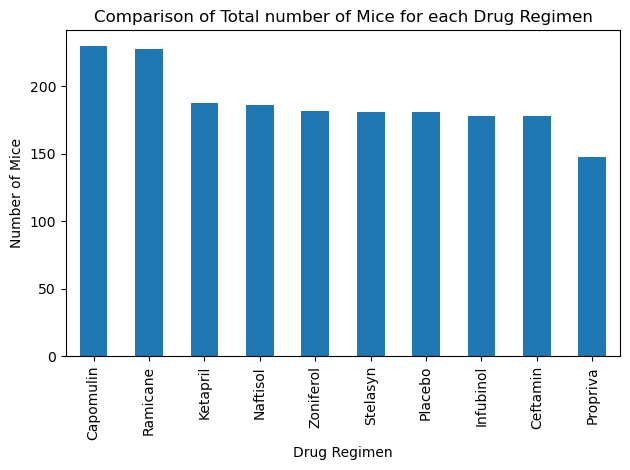

In [10]:
# Creating a new df grouped by drug regimen for bar plots
regimen_df = cleaned_df['Drug Regimen'].value_counts()

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_barPandas = regimen_df.plot.bar(x = 'Drug Regimen', y = 'Number of Mice', rot = 90, legend = False, 
                                             title = 'Comparison of Total number of Mice for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.tight_layout()
plt.show()

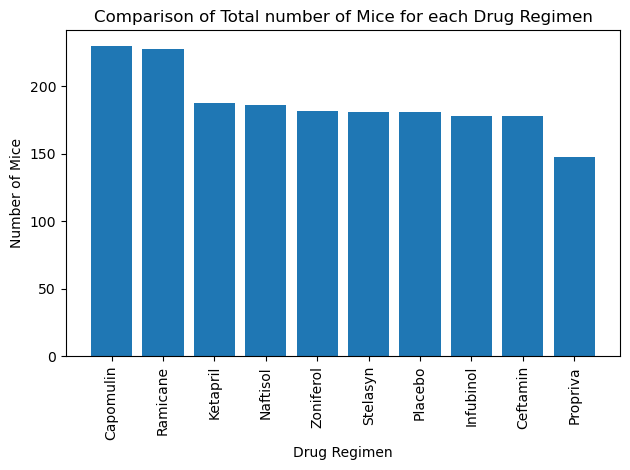

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_df.index.values, regimen_df.values)

plt.ylabel('Number of Mice')
plt.xlabel('Drug Regimen')
plt.title('Comparison of Total number of Mice for each Drug Regimen')
plt.xticks(rotation = 90)
plt.tight_layout()

plt.show()

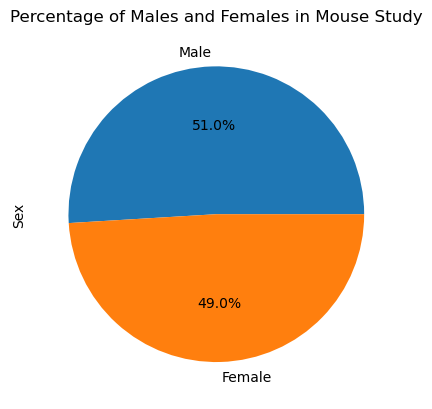

In [26]:
miceSex_df = cleaned_df['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
miceSex_barPandas = miceSex_df.plot(kind = 'pie', autopct = '%1.1f%%', title = 'Percentage of Males and Females in Mouse Study')
plt.show()

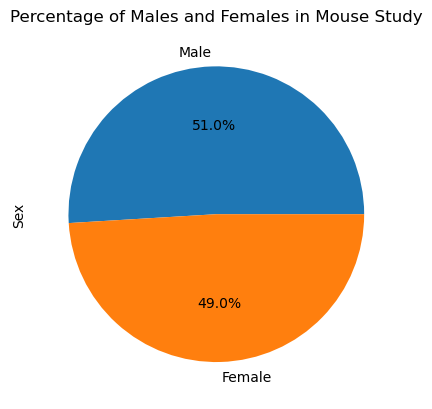

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(miceSex_df, labels = ['Male', 'Female'], autopct = "%1.1f%%")
plt.ylabel('Sex')
plt.title('Percentage of Males and Females in Mouse Study')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = combined_df.groupby(["Mouse ID"]).max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_timepoint[['Mouse ID', 'Timepoint']].merge(combined_df, on = ['Mouse ID','Timepoint'], how = "left")
final_tumorVol = merged_data[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]
final_tumorVol_df = final_tumorVol.rename(columns = {'Tumor Volume (mm3)' : 'Final Tumor Volume (mm3)'})

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_data = []
tumorVol = []

for treatment in treatments:
    tumorVol_df = final_tumorVol_df.loc[final_tumorVol_df['Drug Regimen'] == treatment]['Final Tumor Volume (mm3)']
    tumorVol.append(tumorVol_df)
    
    # calculating the quartiles
    quartiles = tumorVol_df.quantile([0.25, 0.75])

    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    IQR = upperQ - lowerQ

    # calculating the bounds
    lower_bound = lowerQ - (1.5 * IQR)
    upper_bound = upperQ + (1.5 * IQR)

    # calculating outliers
    outliers = tumorVol_df.loc[(tumorVol_df > upper_bound) | (tumorVol_df < lower_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
    
    outlier_data.append(outliers)

Capomulin's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


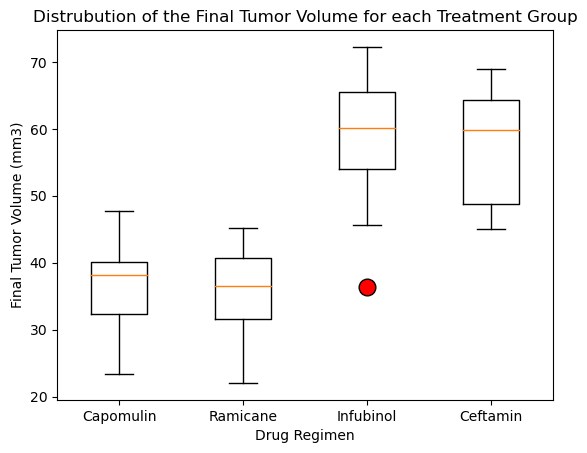

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')

plt.boxplot([tumorVol[0], tumorVol[1], tumorVol[2], tumorVol[3]], labels = treatments, flierprops = flierprops)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distrubution of the Final Tumor Volume for each Treatment Group')

plt.show()

## Line and Scatter Plots

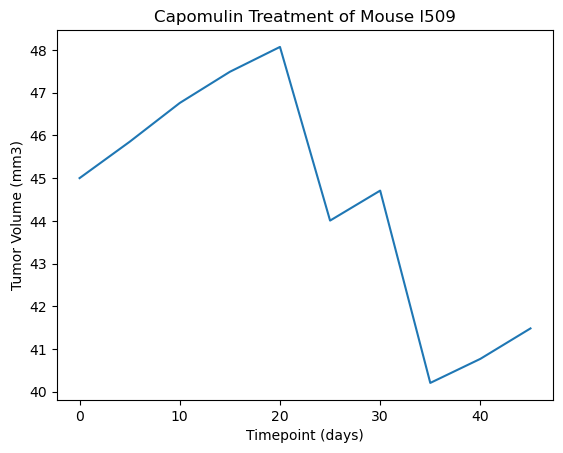

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_line_df = capomulin_data[capomulin_data['Mouse ID'] == 'l509'][['Timepoint', 'Tumor Volume (mm3)']]


plt.plot(capomulin_line_df['Timepoint'], capomulin_line_df['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

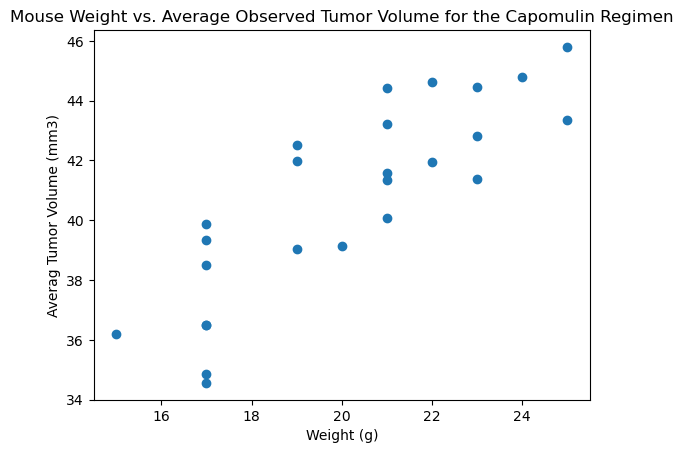

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumorVol_capomulin = capomulin_data.groupby('Mouse ID').mean(numeric_only = True)[['Tumor Volume (mm3)', 'Weight (g)']]

x_values = avg_tumorVol_capomulin['Weight (g)']
y_values = avg_tumorVol_capomulin['Tumor Volume (mm3)']

plt.scatter(x_values, y_values)

plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume for the Capomulin Regimen')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84
The r value is: 0.8419363424694721


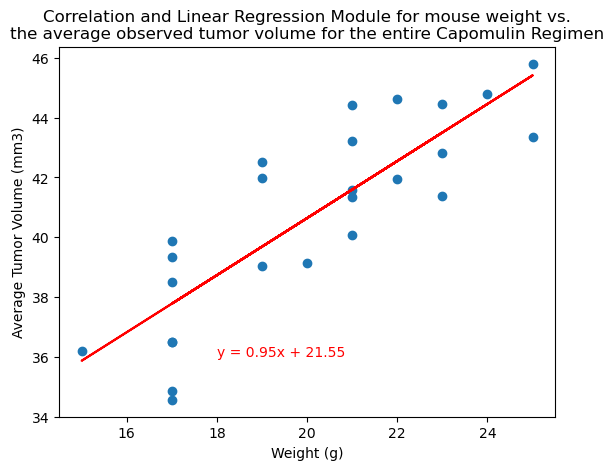

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_tumorVol_capomulin['Weight (g)'], avg_tumorVol_capomulin['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0], 2)}")

# Perform a linear regression on weight vs. tumor volume, y=mx+b
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(avg_tumorVol_capomulin['Weight (g)'], avg_tumorVol_capomulin['Tumor Volume (mm3)'])

# Get regression values
regress_values = (avg_tumorVol_capomulin['Weight (g)'] * slope) + intercept 

# Create line equation string
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'


# Create Plot
plt.scatter(x = avg_tumorVol_capomulin['Weight (g)'], y = avg_tumorVol_capomulin['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Correlation and Linear Regression Module for mouse weight vs.\nthe average observed tumor volume for the entire Capomulin Regimen')

# Label plot and annotate the line equation
plt.annotate(line_eq, (18,36), fontsize = 10, color = 'red')

# Print r value
plt.plot(avg_tumorVol_capomulin['Weight (g)'], regress_values, '-r')
print(f'The r value is: {rvalue}')

# Show plot
plt.show()